In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

results = {
    'Model': ['Logistic Regression', 'SVM', 'Tuned Random Forest'],
    'Accuracy': [0.875, 0.8641, 0.8587],
    'Precision': [0.88, 0.87, 0.88],
    'Recall': [0.90, 0.89, 0.86],
    'F1-Score': [0.89, 0.88, 0.87],
    'ROC AUC': [0.8717, 0.9345, 0.9289]
}

results_df = pd.DataFrame(results)
display(results_df)


,Model,Accuracy,Precision,Recall,F1-Score,ROC AUC
0,Logistic Regression,0.8750,0.88,0.90,0.89,0.8717
1,SVM,0.8641,0.87,0.89,0.88,0.9345
2,Tuned Random Forest,0.8587,0.88,0.86,0.87,0.9289


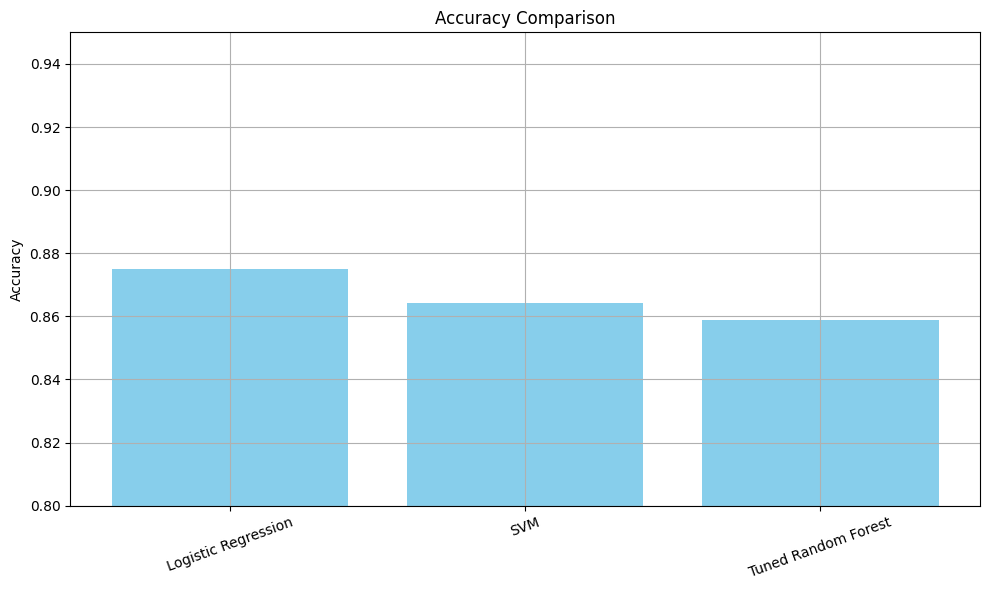

In [12]:
plt.figure(figsize=(10, 6))
plt.bar(df_results['Model'], df_results['Accuracy'], color='skyblue')
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.80, 0.95)
plt.xticks(rotation=20)
plt.grid(True)
plt.tight_layout()
plt.show()

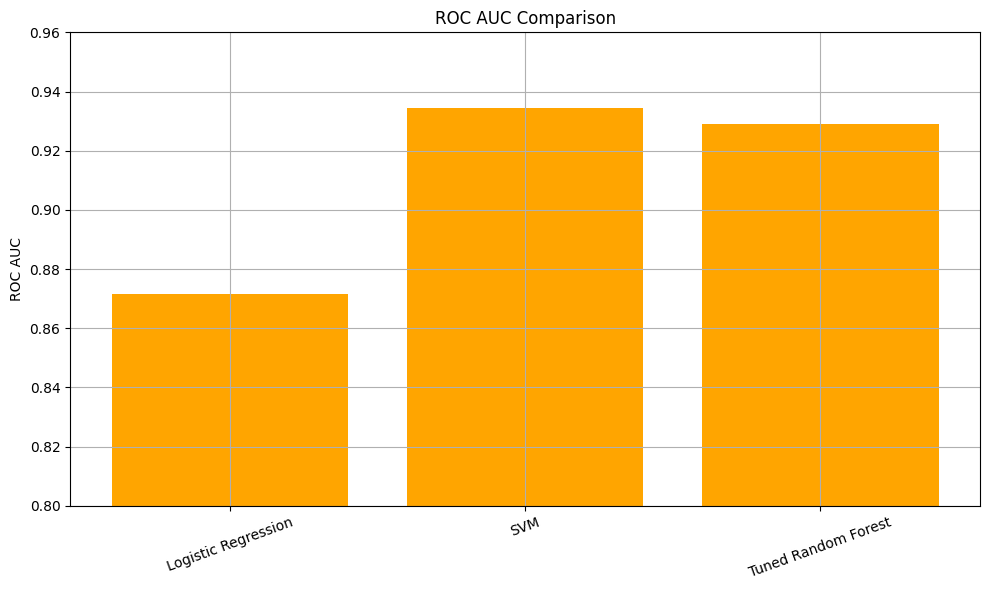

In [13]:
#Vizualizacija - ROC AUC
plt.figure(figsize=(10, 6))
plt.bar(df_results['Model'], df_results['ROC AUC'], color='orange')
plt.title('ROC AUC Comparison')
plt.ylabel('ROC AUC')
plt.ylim(0.80, 0.96)
plt.xticks(rotation=20)
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
import joblib


X_train_processed, X_test_processed, y_train, y_test = joblib.load("train_test_processed.pkl")


best_log_model = joblib.load("best_log_model.pkl")
best_rf_model = joblib.load("best_rf_model.pkl")
svm_model = joblib.load("svm_model.pkl")


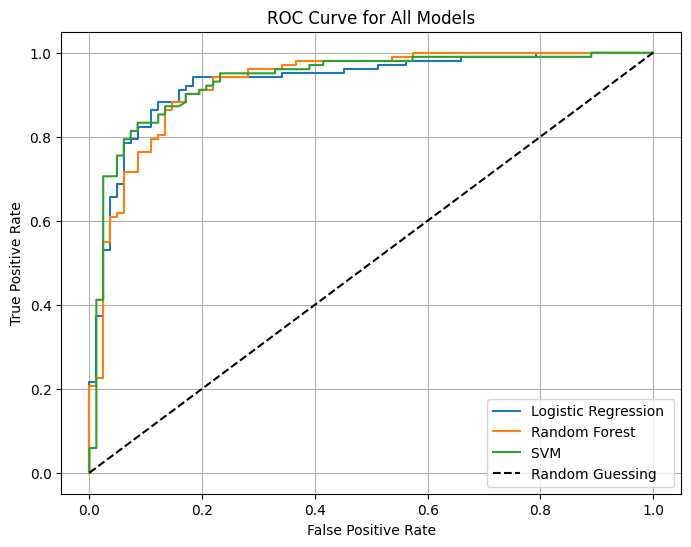

In [15]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob_log = best_log_model.predict_proba(X_test_processed)[:, 1]
y_prob_rf = best_rf_model.predict_proba(X_test_processed)[:, 1]
y_prob_svm = svm_model.predict_proba(X_test_processed)[:, 1]

fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)

auc_log = auc(fpr_log, tpr_log)
auc_rf = auc(fpr_rf, tpr_rf)
auc_svm = auc(fpr_svm, tpr_svm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression ")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest ")
plt.plot(fpr_svm, tpr_svm, label=f"SVM ")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for All Models")
plt.legend()
plt.grid(True)
plt.show()



C:\Users\Korisnik\AppData\Local\Temp\ipykernel_26576\807123787.py:12: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Korisnik\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


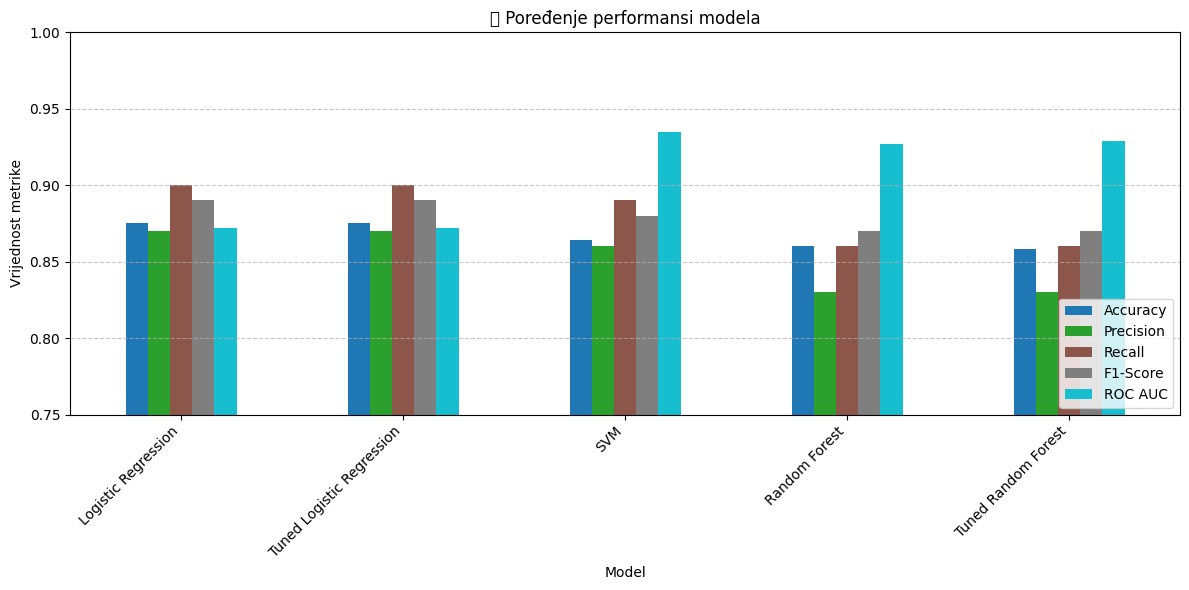

In [ ]:
df_results = pd.DataFrame(results)
df_results.set_index('Model', inplace=True)

ax = df_results.plot(kind='bar', figsize=(12, 6), colormap='tab10')
plt.title('📊 Poređenje performansi modela')
plt.ylabel('Vrijednost metrike')
plt.ylim(0.75, 1.0)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


In [ ]:
#SVM model ima najbolji rezultat za ROC AUC (0.9345) i vrlo dobar balans između svih metrika.

#Logistička regresija se pokazala stabilnom, sa najboljim recallom.

#Random Forest (Tuned) ima solidne metrike, ali je ispod SVM-a i log. regresije.